# FireSat Model

## Model Libraries

The following models establish some of the libraries to be used common to many models, it imports things such as units and creates new attributes not defined within the standard library, like dollars.

Comm Library adds item definitions for links and port definitions for connection ports.

In [ ]:
package CommLibrary {
    import ISQ::TimeValue;
    import SI::Hz;
    import SIPrefixes::mega;
    import MeasurementReferences::DerivedUnit;
    MHz : DerivedUnit = mega * Hz;
    item def 'S-band Uplink' {
        attribute frequency = 2025 [MHz];
    }

    item def 'S-band Downlink' {
        attribute frequency = 2200 [MHz];
    }

    item def 'Ku-band Downlink' {
        attribute frequency = 25600 [MHz];
    }

    port def Ku_Downlink_Port  {
        out signal : 'Ku-band Downlink';
    }

    port def S_Uplink_Port {
        out signal : 'S-band Uplink';
    }

    port def S_Downlink_Port {
        out signal : 'S-band Downlink';
    }

    interface def S_Uplink_Interface {
        end supplierPort : S_Uplink_Port;
        end consumerPort : ~S_Uplink_Port;
        attribute commTime : TimeValue;
    }

    interface def S_Downlink_Interface {
        end supplierPort : S_Downlink_Port;
        end consumerPort : ~S_Downlink_Port;
    }
    
    interface def Ku_Downlink_Interface {
        end supplierPort : Ku_Downlink_Port;
        end consumerPort : ~Ku_Downlink_Port;
    }
}

Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/StringFunctions.kerml...


log4j:WARN No appenders could be found for logger (org.eclipse.xtext.parser.antlr.AbstractInternalAntlrParser).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/IntegerFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/VectorFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/RealFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/DataFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/RationalFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/BaseFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/SequenceFunctions.kerml...
Reading /usr/local/share/jupyter/kernels/sysml/sysml.library/Kernel Libraries/Kernel Function Library/Occurrence

Sep 20, 2023 9:21:17 PM io.github.spencerpark.jupyter.channels.Loop start
INFO: Loop starting...
Sep 20, 2023 9:21:17 PM io.github.spencerpark.jupyter.channels.Loop start
INFO: Loop started.
Sep 20, 2023 9:21:17 PM io.github.spencerpark.jupyter.channels.Loop start
INFO: Loop starting...
Sep 20, 2023 9:21:17 PM io.github.spencerpark.jupyter.channels.Loop start
INFO: Loop started.
Sep 20, 2023 9:21:17 PM io.github.spencerpark.jupyter.channels.Loop start
INFO: Loop starting...
Sep 20, 2023 9:21:17 PM io.github.spencerpark.jupyter.channels.Loop start
INFO: Loop started.


Package CommLibrary (09e3684f-80c4-4e72-9e83-ff8cf7a84474)


In [2]:
package PropLibrary {
    item def Fuel;
    port def FuelPort {
        in fuel : Fuel;
    }
    interface def Fuel_Interface {
        end supplierPort : FuelPort;
        end consumerPort : ~FuelPort;
    }
}

Package PropLibrary (7f164605-8fdc-4780-97b9-6ae8d8e1ad6a)


In [3]:
package VehicleQuantities {
    import ScalarValues::*;
    import Quantities::*;
    import ShapeItems::*;
    import MeasurementReferences::DerivedUnit;
    import VectorCalculations::*;
    import ISQ::*;
    import SI::*;
    import SIPrefixes::*;
    import USCustomaryUnits::*;
    import Time::*;

    kW : DerivedUnit = kilo * W;
    MHz : DerivedUnit = mega * Hz;
    attribute dollars : Real;

    import CommLibrary::*;
    import PropLibrary::*;
}

Package VehicleQuantities (98185641-3bf2-4463-9952-bbccf171b0ec)


## Logical Architecture

### Space Segment Models

#### Spacecraft Models

##### Payload Models

In [4]:
package 'Payload Sensor Logical Architecture' {
    import VehicleQuantities::*;
    abstract part def 'Payload Sensor' {
        abstract part def 'Electro-optical' {
            attribute length : Real;
        }
    }
}

Package Payload Sensor Logical Architecture (041f1b91-d6d7-45a9-b193-20e0b01b6ca9)


##### Spacecraft Models

In [5]:
package 'Propulsion Element' {
    import VehicleQuantities::*;
    
    part def Hundred_N_Thruster {
        attribute Thrust = 100 [N];
        port fuelIn : ~FuelPort;
    }
    
    part def Six_kg_Tank {
        attribute mass = 6 [kg];
        port fuelOut : FuelPort;
    }
    
    abstract part def 'Propulsion System' {
        part Tank : Six_kg_Tank;
        part Engine : Hundred_N_Thruster;
    }
    
    part PropElement : 'Propulsion System';
    
    interface 'Fuel Link' : Fuel_Interface connect 
        supplierPort ::> PropElement.Tank.fuelOut to 
        consumerPort ::> PropElement.Engine.fuelIn;
}

Package Propulsion Element (a96f8467-50ea-4fad-a982-d1d52c895ebf)


In [6]:
package 'Spacecraft Bus Logical Architecture' {
    import VehicleQuantities::*;
    abstract part def 'Spacecraft Bus' {
        import 'Propulsion Element'::*;
        abstract part def ADCS;
        abstract part def Navigation;
        abstract part def 'C&DH';
        abstract part def 'TT&C' {
            part s_antenna {
                port commsIn : S_Uplink_Port;
                port commsOut : S_Downlink_Port;
                attribute gain = 3;
            }
            part ku_antenna {
                port commsOut : Ku_Downlink_Port;
            }
        }
        abstract part def Power;
        abstract part def Structures;
        abstract part def Thermal;
        
        part comms : 'TT&C';
    }
}

Package Spacecraft Bus Logical Architecture (ebdb38e7-fd32-4e1f-b2f6-0447ec0a0c5f)


##### Spacecraft Logical Architecture

In [7]:
package 'Spacecraft Logical Architecture' {
    import VehicleQuantities::*;

    abstract part def Spacecraft {
        import 'Spacecraft Bus Logical Architecture'::*;
        import 'Payload Sensor Logical Architecture'::*;
        part bus : 'Spacecraft Bus';
        part sensor : 'Payload Sensor';
    }

    part def '3UCubeSat' :> Spacecraft {
        constraint def volume :> ShapeItems::RectangularCuboid{
            :>> height := 340.5 [mm];
            :>> width := 100 [mm];
            :>> length := 100 [mm];
        }
    }
}

Package Spacecraft Logical Architecture (1c5014e3-a75f-493e-8847-117db491d736)


#### Space Segment Logical Architecture

In [8]:
package 'Spacecraft Segment Logical Architecture' {
    abstract part def 'Spacecraft Segment' {
        import 'Spacecraft Logical Architecture'::*;

        part spacecraft : '3UCubeSat' [50] {
           attribute orbit {
              attribute sma = 8000 [km];
           }
        }
    }
}

Package Spacecraft Segment Logical Architecture (e245e722-4ced-4f79-8e2a-573dfd5de7a3)


### Launch Segment Model

In [9]:
package 'Launch Segment Parts' {
    abstract part def 'Launch Segment';
}

Package Launch Segment Parts (7b0d5d8a-c8c2-4312-9188-d1d917061522)


### Ground Segment Model

In [10]:
package 'Ground Segment Parts' {
    import VehicleQuantities::*;
    abstract part def 'Ground Segment' {
        abstract part def Communications {
            part s_antenna {
                port commsOut : S_Uplink_Port;
                port commsIn : ~S_Downlink_Port;
                attribute gain = 10;
                attribute location {
                   attribute latitude = 10 [degree];
                   attribute longitude = 10 [degree];
                   attribute altitude = 0 [m];
                }
            }

            part ku_antenna {
                port commsIn : ~Ku_Downlink_Port;
            }
        }
        part comms : Communications;
        abstract part def 'Mission Processing';
        abstract part def Operations;
    }
    
}

Package Ground Segment Parts (e5814fa6-f185-4eb0-9ade-88463e4f5ba3)


### Logical Architecture Model

In [11]:
package 'Logical Architecture' {
    import VehicleQuantities::*;
    import 'Spacecraft Segment Logical Architecture'::*;
    part space : 'Spacecraft Segment';
    import 'Launch Segment Parts'::*;
    import 'Ground Segment Parts'::*;
    part ground : 'Ground Segment';
    
    interface 'S-band Uplink Communication' : S_Uplink_Interface connect 
        supplierPort ::> ground.comms.s_antenna.commsOut to 
        consumerPort ::> space.spacecraft.bus.comms.s_antenna.commsIn;
    
    interface 'S-band Downlink Communication' : S_Downlink_Interface connect 
        supplierPort ::> space.spacecraft.bus.comms.s_antenna.commsOut to 
        consumerPort ::> ground.comms.s_antenna.commsIn;

    interface 'Ku-band Downlink Communication' : Ku_Downlink_Interface connect 
        supplierPort ::> space.spacecraft.bus.comms.ku_antenna.commsOut to 
        consumerPort ::> ground.comms.ku_antenna.commsIn;
}

Package Logical Architecture (2b7e76cf-7d38-48bf-9603-4a938596b0f3)


## Mission, Use Cases

In [12]:
package 'Firesat Mission' {
    import 'Logical Architecture'::'Spacecraft Segment'::Spacecraft::'Payload Sensor'::'Electro-optical';
    import 'Logical Architecture'::'Spacecraft Segment'::Spacecraft::'Spacecraft Bus'::'C&DH';
    alias Sensor for 'Electro-optical';
    alias DataProcessing for 'C&DH';
    part def Fire;
    
    use case def 'Collect' {
        subject sensor : Sensor;
        actor fire : Fire;
        objective {
            doc /* Detect fires with EO */
        }
    }
    
    use case def 'Process' {
        subject dpe : DataProcessing;
        actor sensor : Sensor;
        objective {
            doc /* Collect data for processing */
        }
    }
    
    use case 'Detect Fires' : 'Collect' {
        first start;
        
        then use case 'Process Data' : 'Process' {
            actor :>> sensor = 'Collect'::sensor;
        }
    }
    
}

Package Firesat Mission (2f3e9206-0a49-452b-8204-88bfe9d1344b)


## Requirements

In [30]:
package Requirements {
    import 'Logical Architecture'::*;
    import VerificationCases::VerdictKind;
    
    requirement CommunicationReq {
        subject link : S_Uplink_Interface;
        attribute commTime : TimeValue = link.commTime;
        attribute commReqd : TimeValue = 600 [s];
        doc /* The ground shall be able to 
        * communicate to a satellite for 10 minutes per day. */
        require constraint { commTime >= commReqd }
    }

    // This verification has a single stage.
    verification def CommTimeTest_single {
        import AnalysisTooling::*;
        
        subject link : S_Uplink_Interface;
        objective {
            verify CommunicationReq;
        }

        action collectData {
            metadata ToolExecution {
                toolName = "Artifacts";
                uri = "aserv://localhost/Vehicle/Equation1";
            }

            in location = (ground.comms.s_antenna.location.latitude, 
               ground.comms.s_antenna.location.longitude, 
               ground.comms.s_antenna.location.altitude) { @ToolVariable { name = "groundLocation"; } }
            in gainT = ground.comms.s_antenna.gain { @ToolVariable { name = "gainTransmit"; } }
            in gainR = space.spacecraft.bus.comms.s_antenna.gain { @ToolVariable { name = "gainReceive"; } }
            out result : VerdictKind { @ToolVariable { name = "bucket://junit.xml"; } }
        }
        
        return verdict : VerdictKind = collectData.result;
    }

    // This is a multi-stage validation.
    verification def CommTimeTest_multi {
        import AnalysisTooling::*;
        
        subject link : S_Uplink_Interface;
        objective {
            verify CommunicationReq;
        }
        
        action collectData {
            metadata ToolExecution {
                toolName = "Harbor";
                uri = "aserv://localhost/Vehicle/Equation1";
            }

            metadata ToolExecution {
                toolName = "Artifacts";
                uri = "aserv://localhost/Vehicle/Equation1";
            }

            in location = (ground.comms.s_antenna.location.latitude, 
               ground.comms.s_antenna.location.longitude, 
               ground.comms.s_antenna.location.altitude) { @ToolVariable { name = "groundLocation"; } }
            in gainT = ground.comms.s_antenna.gain { @ToolVariable { name = "gainTransmit"; } }
            in gainR = space.spacecraft.bus.comms.s_antenna.gain { @ToolVariable { name = "gainReceive"; } }
            out commTimeFile { @ToolVariable { name = "bucket://output.txt"; } }
        }

        action processData {
            metadata ToolExecution {
                toolName = "Harbor";
                uri = "aserv://localhost/Vehicle/Equation1";
            }

            metadata ToolExecution {
                toolName = "Artifacts";
                uri = "aserv://localhost/Vehicle/Equation1";
            }
            in commTimeFile = collectData.commTimeFile { @ToolVariable { name = "bucket://output.txt"; } }
            in commReqd = CommunicationReq.commReqd { @ToolVariable { name = "commReqd"; } }
            out result : VerdictKind { @ToolVariable { name = "bucket://junit.xml"; } }
        }
        
        return verdict : VerdictKind = processData.result;
    }

    // This validation has invalid actions.
    verification def CommTimeTest_invalid {
        import AnalysisTooling::*;
        
        subject link : S_Uplink_Interface;
        objective {
            verify CommunicationReq;
        }

        action collectData {
            metadata ToolExecution {
                toolName = "Artifacts";
                uri = "aserv://localhost/Vehicle/Equation1";
            }

            in location = (ground.comms.s_antenna.location.latitude, 
               ground.comms.s_antenna.location.longitude, 
               ground.comms.s_antenna.location.altitude) { @ToolVariable { name = "groundLocation"; } }
            in gainT = ground.comms.s_antenna.gain { @ToolVariable { name = "gainTransmit"; } }
            in gainR = space.spacecraft.bus.comms.s_antenna.gain { @ToolVariable { name = "gainReceive"; } }
            out commTimeFile { @ToolVariable { name = "bucket://output.txt"; } }
        }

        action processData {
            metadata ToolExecution {
                toolName = "Harbor";
                uri = "aserv://localhost/Vehicle/Equation1";
            }
            in commTimeFile = collectData.commTimeFile { @ToolVariable { name = "bucket://output.txt"; } }
            in commReqd = CommunicationReq.commReqd { @ToolVariable { name = "commReqd"; } }
            out result : VerdictKind { @ToolVariable { name = "bucket://junit.xml"; } }
        }
        
        return verdict : VerdictKind = processData.result;
    }
    
    verification CommTimeTest_Val {
        return verdict = VerdictKind::pass;
    }
    
}

Package Requirements (869ea793-33ec-44d5-ab75-7b556756e51d)


In [14]:
%show Requirements

Package Requirements (06c4eeaf-fd2b-49b4-9495-45073af22877)
  [NamespaceImport] Package Logical Architecture (2b7e76cf-7d38-48bf-9603-4a938596b0f3)
  [MembershipImport] OwningMembership (6938ec1e-bab7-48c3-83cd-c4e6102cdfa0)
  [OwningMembership] RequirementUsage CommunicationReq (696c8e66-879b-4497-b7a5-572b3022b992)
    [ReturnParameterMembership] ReferenceUsage result (8f8c2a7f-f124-438a-8b60-2a3c7b45c086)
  [OwningMembership] VerificationCaseDefinition CommTimeTest (868fbf1b-dabb-4b3a-9969-0916c57bfc2a)
    [Subclassification (implicit)] VerificationCaseDefinition VerificationCase (47f5248d-9140-50c8-b28c-16d68d573621)
    [NamespaceImport] LibraryPackage AnalysisTooling (4e927f98-8d7d-5bd1-a1ea-81cc460b41e3)
    [SubjectMembership] ReferenceUsage link (775ab06c-e5b3-410f-b394-2dc4cb26da6a)
      [Subsetting (implicit)] Feature objects (33d1bd68-58e2-555e-98a3-b0b679542260)
      [Redefinition (implicit)] ReferenceUsage subj (d8e03d87-a650-5e7a-a16d-2d4afc0539ce)
      [FeatureTypin

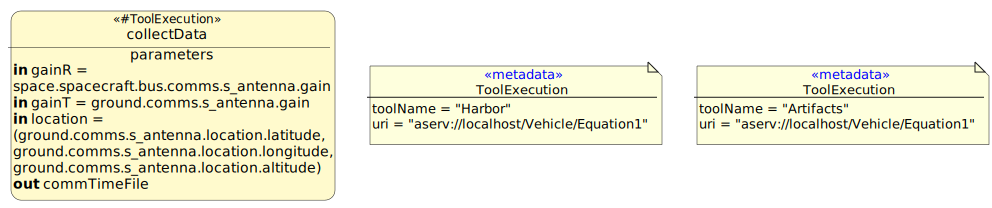

In [15]:
%viz --style=STDCOLOR Requirements::CommTimeTest::collectData

In [16]:
%eval -h

Usage: %eval [--target=<NAME>] <EXPR>

Print the results of evaluating <EXPR> on the target given by <NAME>, which must be fully qualified.
If a target is not given, then evaluate <EXPR> in global scope.


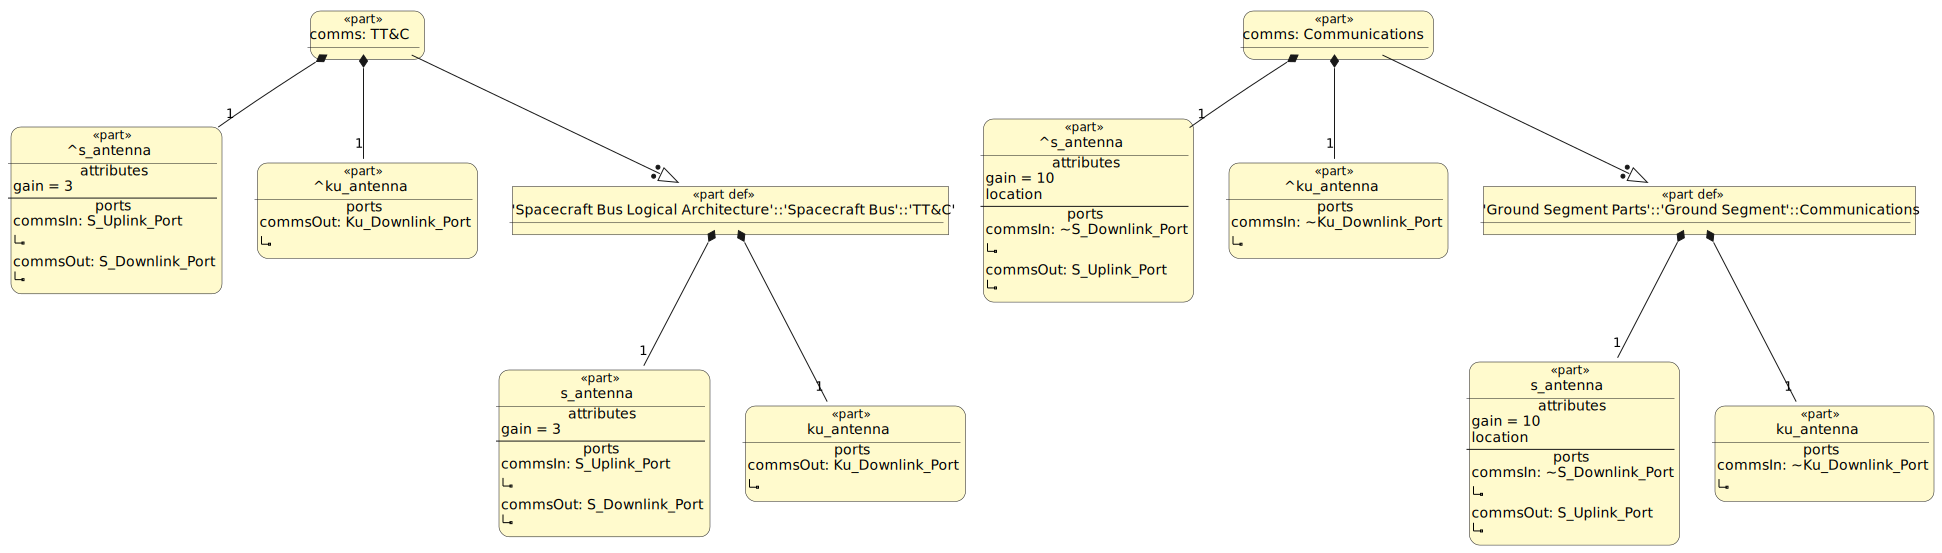

In [17]:
%viz --style=STDCOLOR --style=COMPTREE --style=SHOWINHERITED --style=SHOWIMPORTED "Logical Architecture::space::spacecraft::bus::comms" "Logical Architecture::ground::comms"

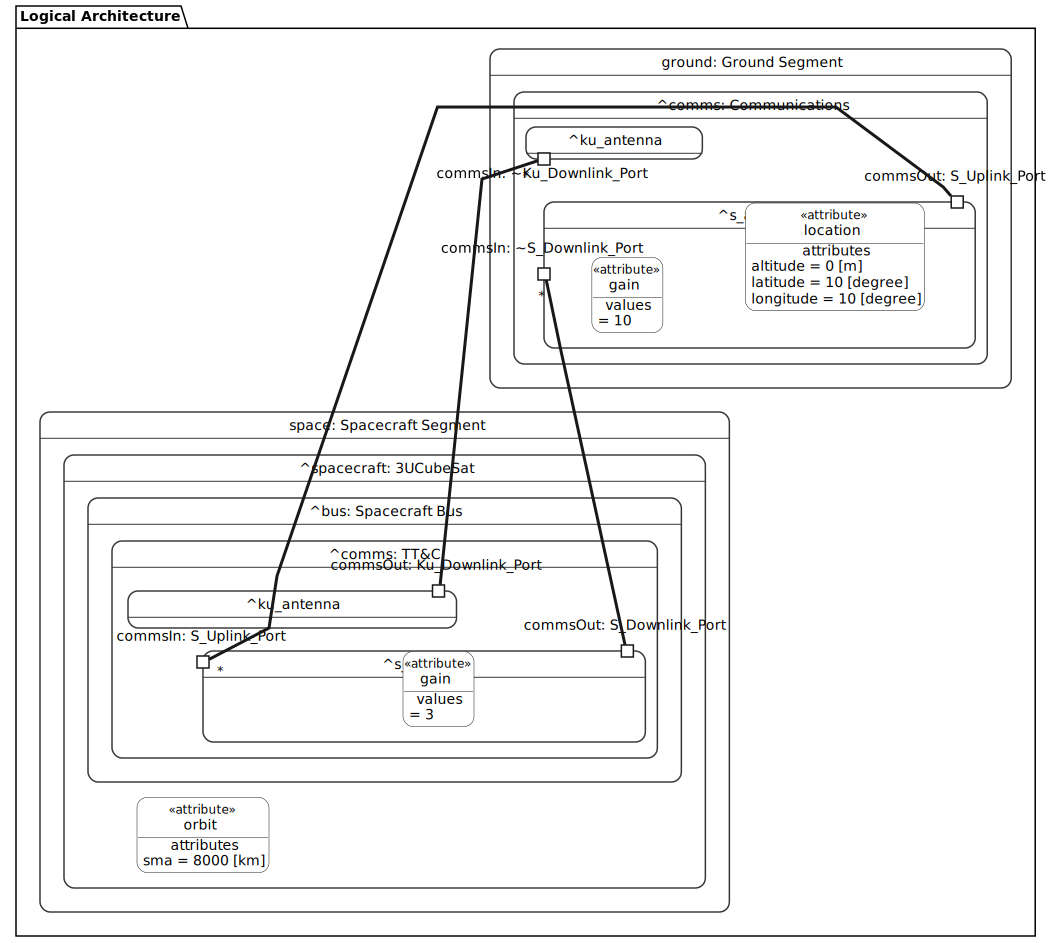

In [18]:
%viz --view=interconnection --style=LR --style=POLYLINE "Logical Architecture"

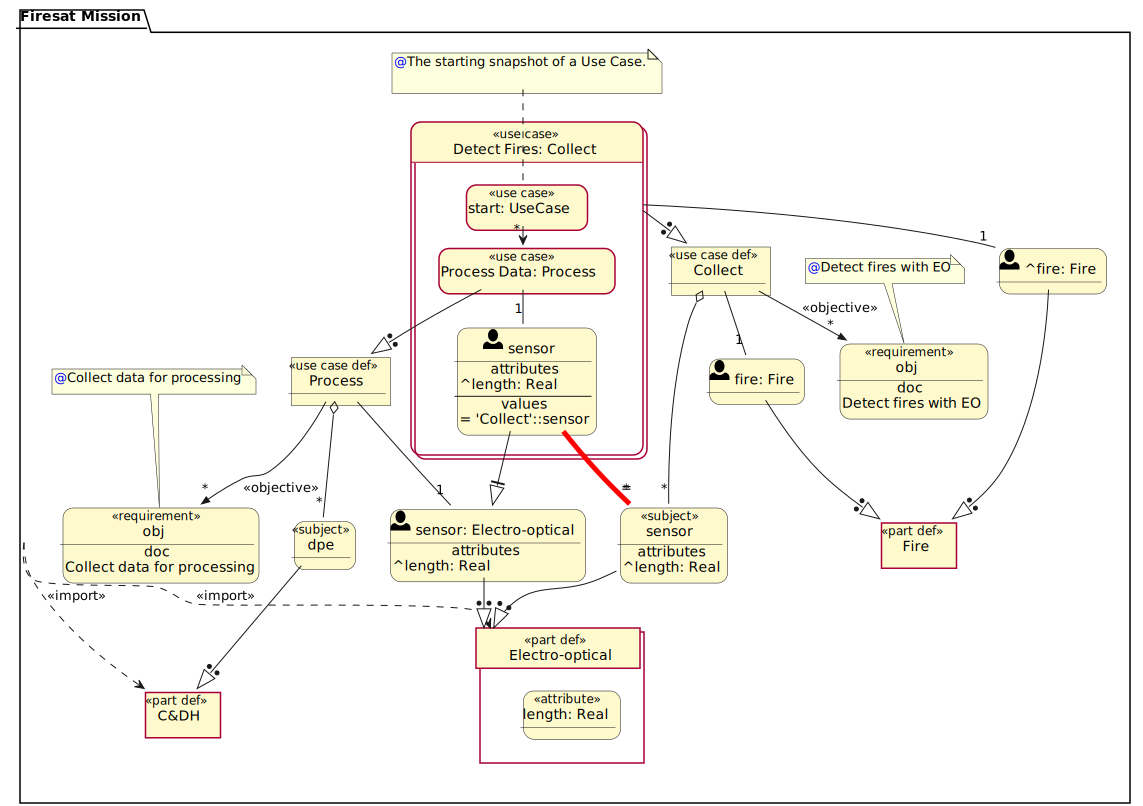

In [19]:
%capture -t __3_0_Model raw
%viz --style=STDCOLOR --style=SHOWINHERITED "Firesat Mission"

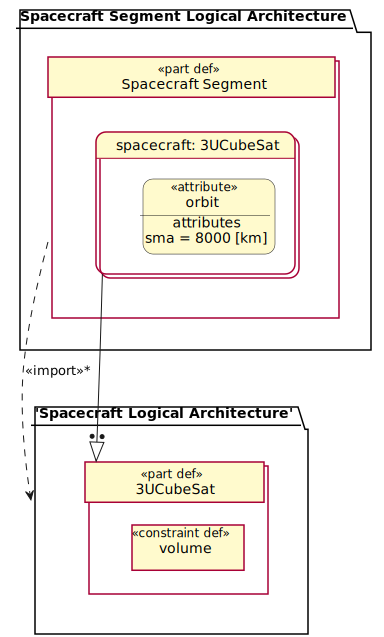

In [20]:
%viz --style=STDCOLOR --style=SHOWIMPORTED "Spacecraft Segment Logical Architecture"

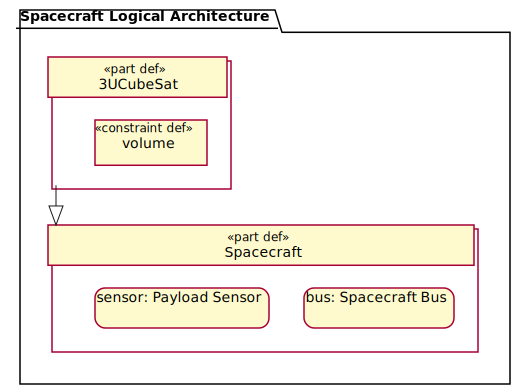

In [21]:
%viz --style=STDCOLOR "Spacecraft Logical Architecture"

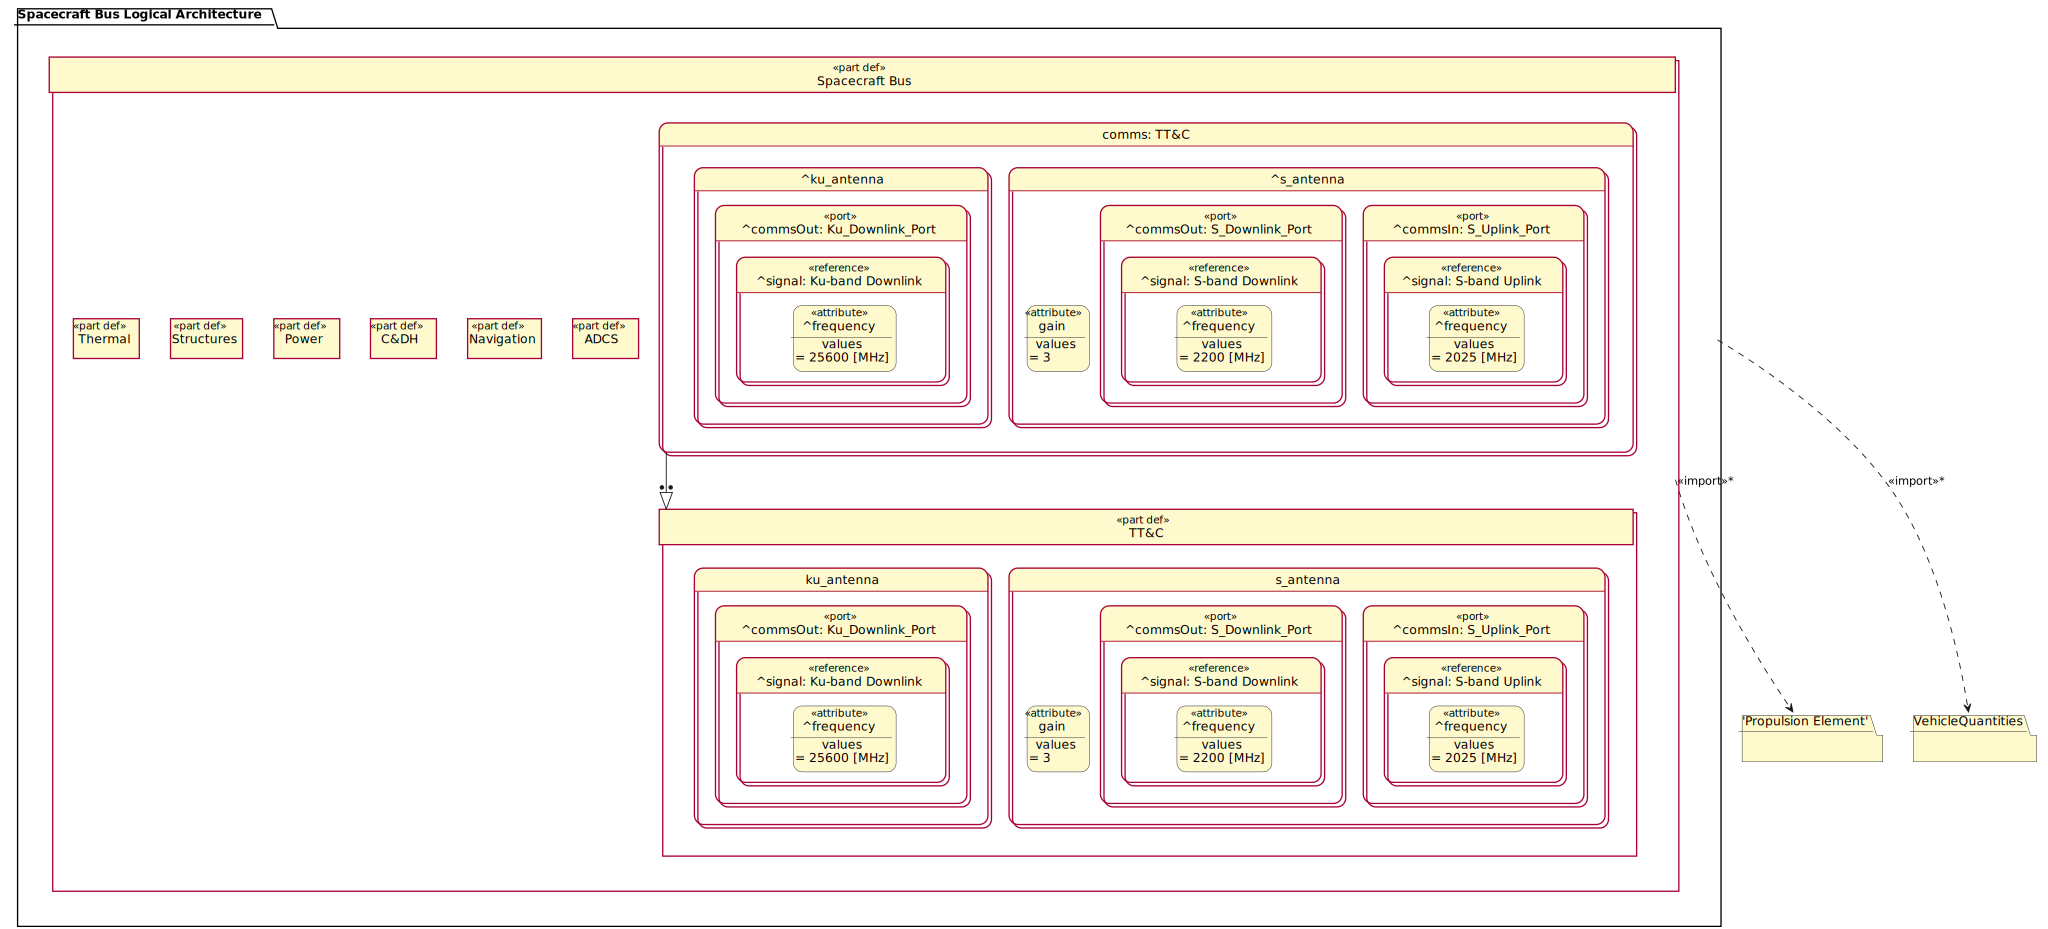

In [22]:
%viz --style=STDCOLOR --style=SHOWINHERITED --style=SHOWIMPORTED "Spacecraft Bus Logical Architecture"

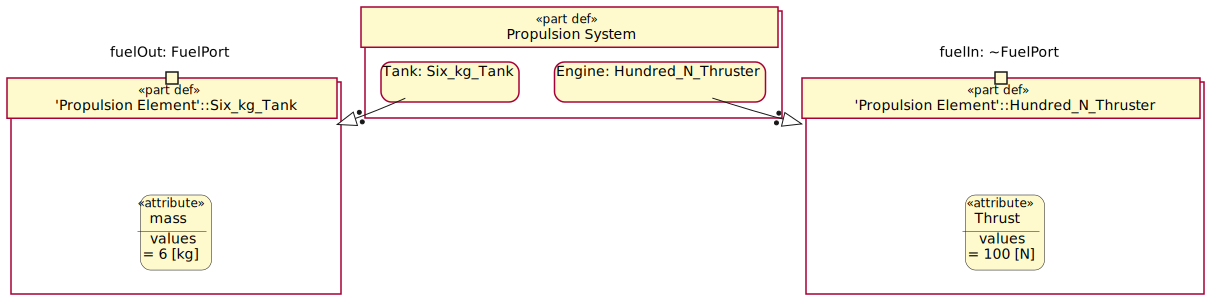

In [23]:
%viz --style=STDCOLOR --style=SHOWIMPORTED "Spacecraft Bus Logical Architecture::Spacecraft Bus::Propulsion System"

In [24]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

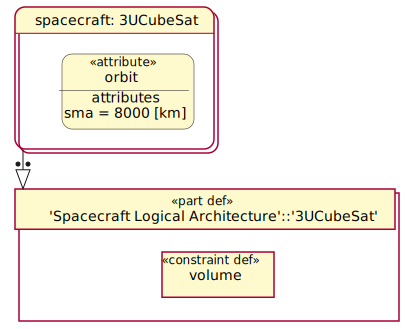

In [25]:
%viz --style=STDCOLOR --style=SHOWIMPORTED "Spacecraft Segment Logical Architecture::Spacecraft Segment::spacecraft"